# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [1]:
import pandas as pd

df = pd.read_csv("../homework-1-tassychen/train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [2]:
def num_nans(df):
    
    return df.isnull().any(axis=1).sum()

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [3]:
def drop_na(df):
    
    return df.dropna(axis='columns', thresh = df.shape[0] - 200)

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [4]:
def to_numerical(df):
    df['Sex'].replace(['male','female'],[0,1])
    return df['Sex']

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [5]:
#helper function to extract first name, title, and middle name(if there is any)
def helper(name):
        #title
        name[2] = name[1][0]
        #has only up to first name
        if (3>len(name[1]) >=2) :
            if name[1][1][0] != "(":
                name[3] = name[1][1]
            else:
                name[3] = None
        #has up to middle name 
        elif len(name[1]) >=3:
            #if the word right after first name is not the nickname
            if (name[1][1][0] != "(") and (name[1][2][0] !="("):
                name[3] = name[1][1]
                name[4] = name[1][2]
            #if the word right after first name is the nickname
            elif (name[1][1][0] != "(") and (name[1][2][0] =="("):
                name[3] = name[1][1]
                name[4] = None
            else:
                name[4] = None
        else:
            name[4] = None
         
        return name

In [6]:
def extract_names(df):
    copy_df = df.copy(deep = True)
    # to split and get last name, and the remaining part
    copy_df['Name_split'] = copy_df['Name'].str.split(", ")
    #save last name to column "last name", and remaining part to column "name" so later we will extract
    #each component depending on different composition of names
    copy_df = pd.DataFrame(copy_df["Name_split"].to_list(), columns=['Last Name', 'Name'])

    the_rest = copy_df['Name'].str.split(" ")
    copy_df['Name'] = the_rest
    copy_df['Title'] = None
    copy_df['First Name'] = None
    copy_df['Middle Name'] = None
    copy_df = copy_df.apply(helper, axis = 1)

    return copy_df[['First Name', 'Middle Name', 'Last Name', 'Title']]

    
    
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head(50)
# df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr.
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,James,None,Moran,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Oscar,W,Johnson,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Nicholas,None,Nasser,Mrs.


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [7]:
def replace_with_mean(df):
    mean = df.Age.mean()
    df['Age'].fillna((mean), inplace=True)
    
    return df.Age

df['Age'] = replace_with_mean(df)
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,William,Henry,Allen,Mr.
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,James,None,Moran,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Oscar,W,Johnson,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Nicholas,None,Nasser,Mrs.


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64


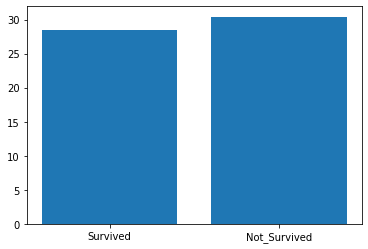

In [8]:
# your code here
import matplotlib.pyplot as plt

avg_age = df.groupby('Survived').Age.mean()
print(avg_age)
x_axis = ['Survived', 'Not_Survived']

y_axis = [avg_age[1], avg_age[0]]

plt.bar(x_axis, y_axis)
plt.show()

-> your answer here
From the graph, we can see that average age of survived ones is a bit lower than the ones that did not survive. Younger passengers were more likely being saved.

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

Sex
female    233
male      109
Name: Survived, dtype: int64


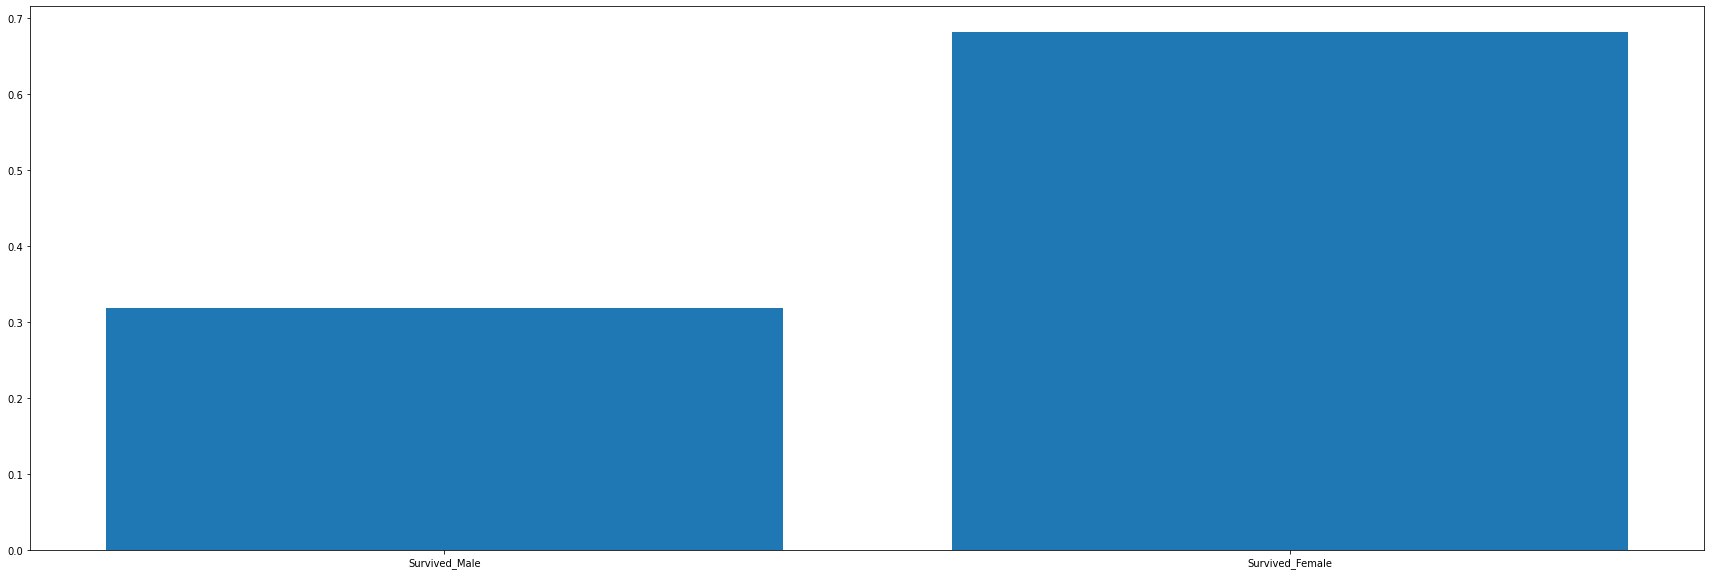

In [9]:
# your code here
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))


sum_survived = df.groupby('Survived').Sex.count()[1]
female = df.groupby('Sex').Survived.sum()[0]
male = df.groupby('Sex').Survived.sum()[1]
print(df.groupby('Sex').Survived.sum())
# print(male)
# print(female)

x_axis = ['Survived_Male', 'Survived_Female']

y_axis = [male/sum_survived, female/sum_survived]

plt.bar(x_axis, y_axis)
plt.show()



-> your answer here
For all that survived, the number of females is more than twice that of the males. Females are priotized when getting saved.

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

<BarContainer object of 17 artists>

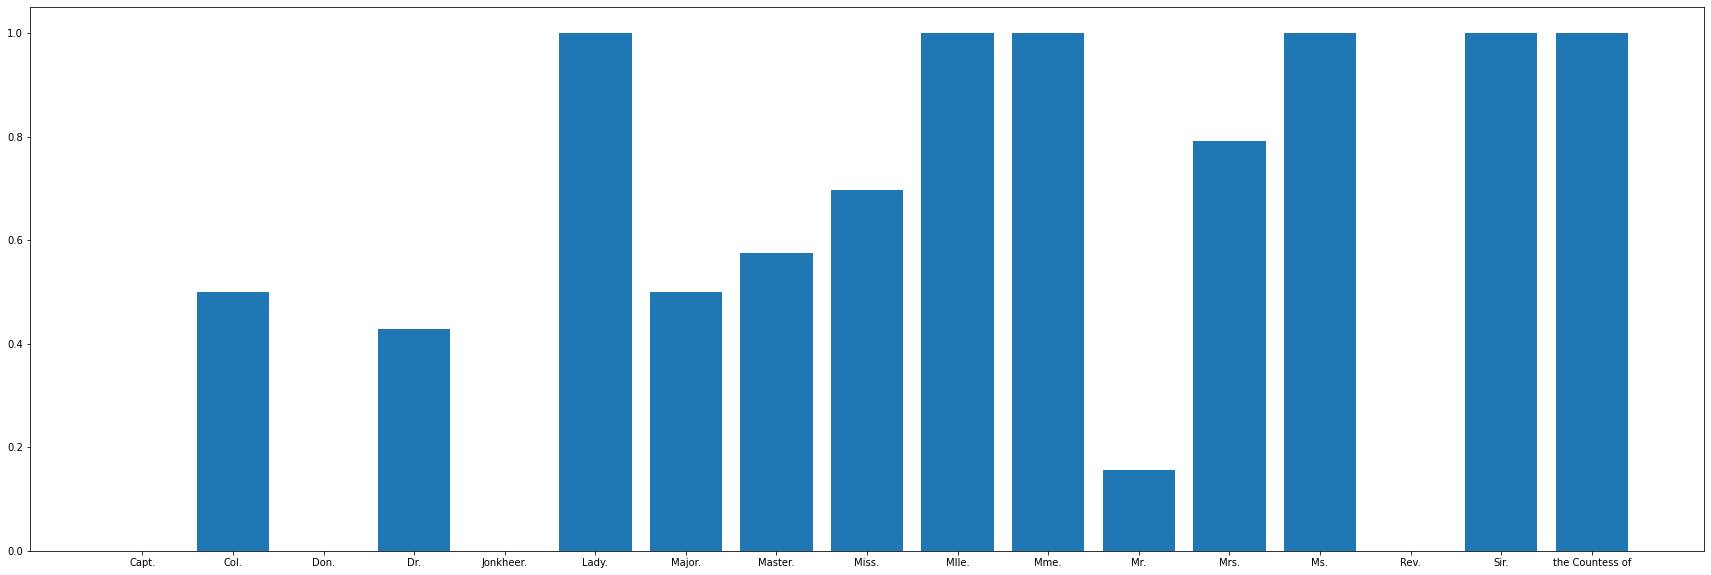

In [10]:
# your code here
sum_titles = df.groupby('Title').Survived.count()
survived = df.groupby('Title').Survived.sum() 
# print(sum_titles)
# print(survived)
ratio = survived / sum_titles
title = ['Capt.', 'Col.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the Countess of']

plt.figure(figsize=(30,10))


plt.bar(title, list(ratio))





-> your answer here
Here we see for people with title "Lady", "Mlle", "Mme", "Ms", "Sir", and the Countess of" have higher proportion of surviving than the rest. However, some groups of people with certain titles have higher proportion of surviving might because the total number of the group of that certain title is small. Those people with noble titles are priotized when getting saved.

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

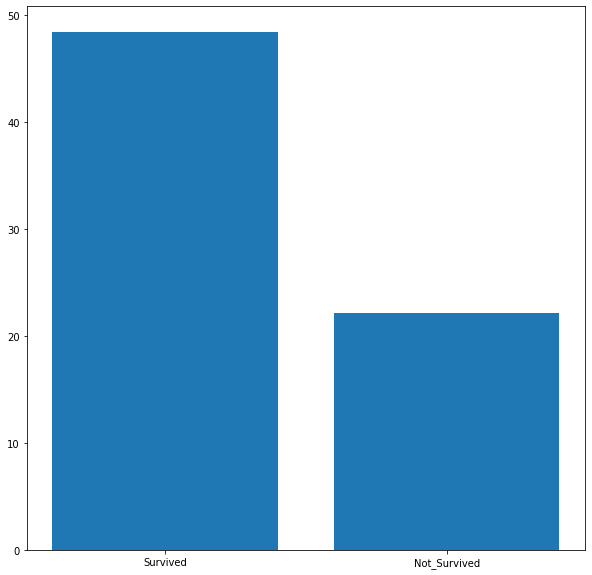

In [11]:
# your code here
plt.figure(figsize=(10,10))

avg_fare = df.groupby('Survived').Fare.mean()
x_axis = ['Survived', 'Not_Survived']
y_axis = [avg_fare[1], avg_fare[0]]
plt.bar(x_axis, y_axis)
plt.show()

-> your answer here
the average fare for survived is more than twice of the average of the not survived's fare. It is possibily because the people with higher fare is priotized when getting saved. 

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

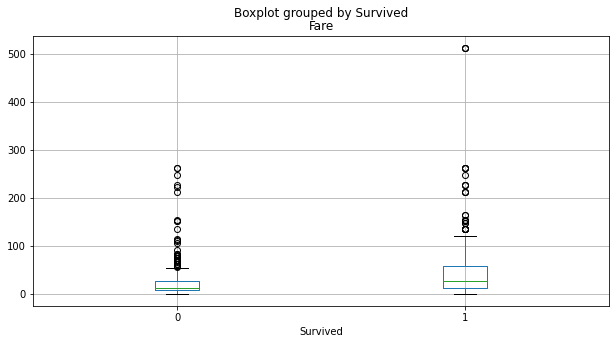

In [12]:
# your code here
# fig = plt.figure(figsize =(10, 7))
# df.title("Fare for Survived and not Survived")
df.boxplot(column='Fare', by ='Survived', figsize=(10,5))

-> your answer here
For those survived, the median of the fare is higher than the not survived. While the interquartile range for the not survived is much centralized, that of survived is wider. For the people not survived, they have larger proportion with lower fare. However, for people survived, people with lower fare still had higher chance to get saved. 

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [13]:
# your code here
def fare(df):
    avg_fare = df.Fare.mean()
    std_fare = df.Fare.std()
    
    return df.apply(lambda x: (x- avg_fare)/ std_fare if x.name == 'Fare' else x)


df = fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786404,C,John,Bradley,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,None,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420494,S,Jacques,Heath,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr.


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [14]:
copy_df = df._get_numeric_data()
copy_df = copy_df.dropna()
copy_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,-0.502163
1,2,1,1,38.0,1,0,0.786404
2,3,1,3,26.0,0,0,-0.488580
3,4,1,1,35.0,1,0,0.420494
4,5,0,3,35.0,0,0,-0.486064


m) Ignoring passenger ID, write a function that returns the names of the N most similar **pairs** of passengers using the euclidean distance and ignoring pairs that have distance zero - (15 points)

In [15]:
import numpy as np

def euclidean_d(v1, v2):
    sub = [(v1[i] - v2[i]) ** 2 for i in range(len(v1))]
    return sum(sub) ** 0.5

#here is to create a new column 'Euclid Distance' by calculating the distance between passengerx and passengery

def compare(col):
#     row[1:7] means all numerical columns(except id) for passengerx and 
#     row[9:15] means all numerical columns(except id) for passengery
    col[16] = euclidean_d(col[1:7], col[9:15])
    return col

def N_most_similar_pairs(dataframe, N):
    dataframe['Name'] = df['Name']
    new_df = dataframe.merge(dataframe, how = "cross") #need name from origional df
    new_df = new_df[new_df['PassengerId_x']!= new_df['PassengerId_y']]
    new_df['Euclid Distance'] = None
    new_df = new_df.apply(compare, axis = 1)
    new_df = new_df[new_df['Euclid Distance'] != 0]
    new_df = new_df.drop(['PassengerId_x', 'PassengerId_y'], axis=1)
    answer = new_df.nsmallest(N, 'Euclid Distance')

    return answer[['Name_x', 'Name_y']]

names = N_most_similar_pairs(copy_df, 3)
names.head()

# print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(copy_df, 3)))

,Name_x,Name_y
214418,"Zabour, Miss. Thamine","Caram, Mrs. Joseph (Maria Elias)"
346337,"Sadlier, Mr. Matthew","O'Connell, Mr. Patrick D"
515238,"Caram, Mrs. Joseph (Maria Elias)","Zabour, Miss. Thamine"


## Exercise 2 (40 points)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/) and challenge your understanding of clustering and kmeans.

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. Hint: the centroid of the cluster has the same dimensions as the images in the dataset. - (10 points)

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


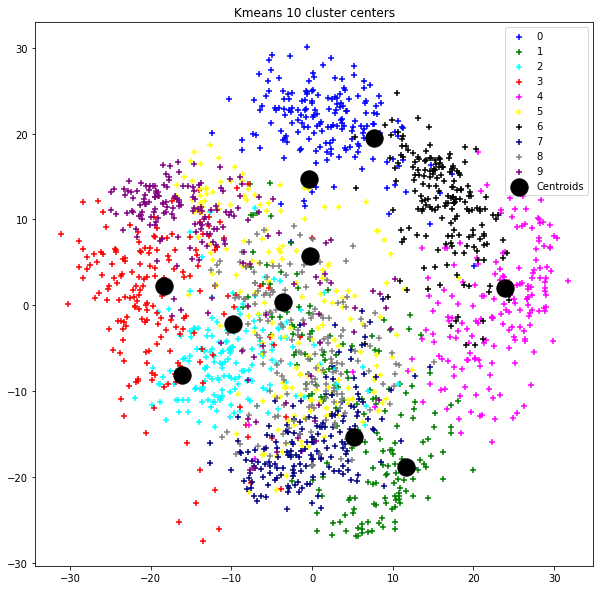

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.datasets import load_digits

#import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.rcParams["figure.figsize"]= (10,10)



mnist = load_digits()
x = mnist.data
#num of clusters
K = 10
kmeans = KMeans(n_clusters=10, random_state=0).fit(x)

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(x)
# cluster_centers = scaler.fit_transform(kmeans.cluster_centers_)

scaler = PCA(n_components=2, random_state=0)
scaled_data = scaler.fit_transform(x)
cluster_centers = scaler.fit_transform(kmeans.cluster_centers_)

# print(scaled_data[:5])
colors=['blue','green','cyan','red', 'magenta','yellow','black','navy','grey','purple']
markers = ["+", "+", "+", "+","+", "+","+", "+","+", "+"]



d = {'col1':scaled_data[:,0],'col2':scaled_data[:,1],'y':mnist.target}
df = pd.DataFrame(data = d)


df["color"] = df.y.apply(lambda x: colors[x])
df["marker"] = df.y.apply(lambda x: markers[x])

for i in range(K): 
    plt.scatter(
        df[df.y==i].col1.values, 
        df[df.y==i].col2.values, 
        marker=df[df.y==i].marker.unique().item(), 
        label=df[df.y==i].y.unique().item(), 
        c=df[df.y==i].color.values
    )
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], label="Centroids", s=300, color="black", marker="o")
plt.legend()
plt.title("Kmeans 10 cluster centers", fontsize=12)
plt.show()




# for i in range(K):
#     plt.scatter()

# kmeans = KMeans(n_clusters=10,random_state=0).fit(x)

# mnist.keys()
# x
# np.array(x)
# your code here

b) Each of the images has a label corresponding to the digit that the image represents. These labels generate a clustering of the images where all images of digit 1 for example are in cluster labeled `1`. Compare the [silhouette scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the clustering you created above to those of the clustering generated from the labels attached to each image. Explain - (10 points)

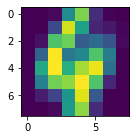

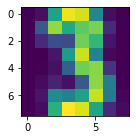

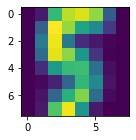

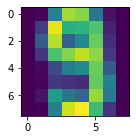

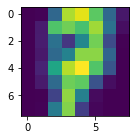

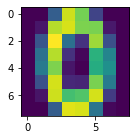

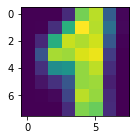

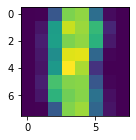

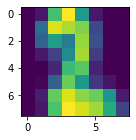

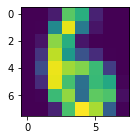

In [17]:
from sklearn.metrics import silhouette_score

images = kmeans.cluster_centers_.reshape([10, 8, 8])
plt.rcParams["figure.figsize"]= (2,2)
for i in images:
    plt.imshow(i)
    plt.show()


In [18]:
# pip install yellowbrick

In [19]:
def s_score(target,labels):
    score_target = silhouette_score(x, target, metric='euclidean')
    score_labels = silhouette_score(x, labels, metric='euclidean')
    return score_target, score_labels

socre_t,score_l = s_score(mnist['target'], kmeans.labels_)
    
print(f"Silhouette Score for: Clustering from labels: {socre_t}, Clustering from Kmeans created: {score_l}")





        
    

Silhouette Score for: Clustering from labels: 0.1629432052257522, Clustering from Kmeans created: 0.18251916424600556


-> your answer here
the silhouette score for clustering that i computed is bigger than that of the cluster from the labels. That means the clustering created by the kmeans is better than that created by labels since a higher value indicates that the image is well matched to its own cluster and poorly matched to neighboring clusters. 


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=10, random_state=0))

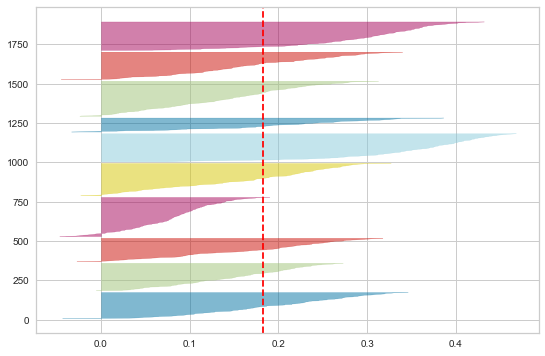

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.rcParams["figure.figsize"] = (9,6)

visualizer1 = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer1.fit(mnist.data)

# visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# visualizer1.fit(mnist.data)

# visualizer.show()

c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (5 points)

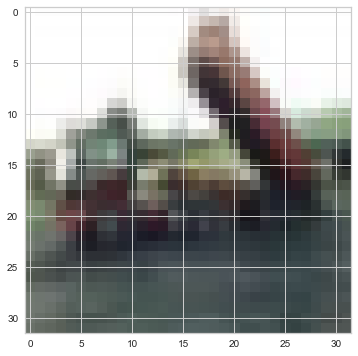

In [21]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict



file = "cifar-10-batches-py/data_batch_1"
data_1 = unpickle(file)
random_index = np.random.randint(len(data_1))

image = data_1[b'data'][random_index]
image = image.reshape(3,32,32)
image = image.transpose(1,2,0)



plt.imshow(image)
plt.show()



d) This image is 32 x 32 = 1024 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. So, in a way, we have a dataset of 1024 3-dimensional data points. By applying Kmeans to this dataset, we are clustering for similar colors (so all the blues might be in the same cluster etc.). The centroid of each cluster will also be an RGB color. We can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K colors to recreate the image.

Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

For example, if the original image is the following:

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


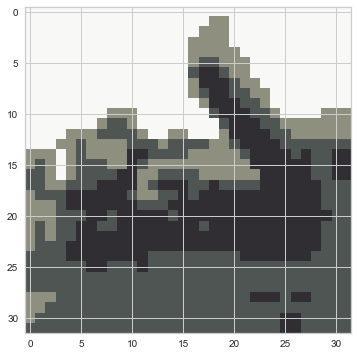

In [22]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(image.reshape(32 * 32, 3))
new_image = kmeans.cluster_centers_[kmeans.labels_].reshape([32, 32, 3]) 
new_image = new_image/255
plt.imshow(new_image)
plt.show()

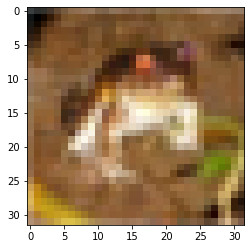

In [23]:
from IPython.display import Image
Image(filename="frog.png", width=300, height=300)

The transformation, using only 4 colors / centroids would look like:

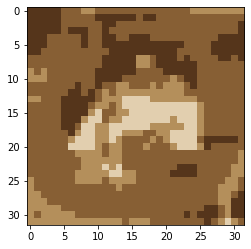

In [24]:
Image(filename="frog_4.png", width=300, height=300)

e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


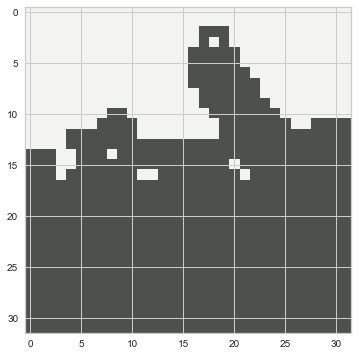

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


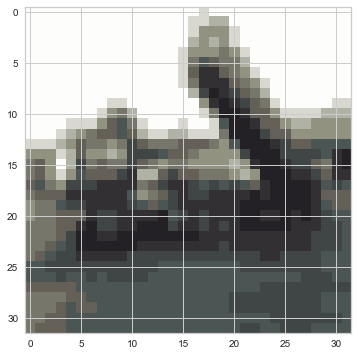

In [25]:
def cluster_n(N):
    kmeans = KMeans(n_clusters=N, random_state=0).fit(image.reshape(32 * 32, 3))
    new_image = kmeans.cluster_centers_[kmeans.labels_].reshape([32, 32, 3]) 
    new_image = new_image/255
    
    return new_image

plt.imshow(cluster_n(2))

plt.show()
plt.imshow(cluster_n(10))
plt.show()
